In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
wine = pd.read_csv("wine.csv")

In [3]:
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
column_names = ['Cultivar', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 
                'Magnesium', 'TotalPhenols', 'Flavanoids', 'NonflavanoidPhenols', 
                'Proanthocyanins', 'ColorIntensity', 'Hue', 'OD280/OD315', 'Proline']


wine = pd.read_csv('wine.csv', header = None, names = column_names)

what does this header = none do?

In [5]:
wine.head()

,Cultivar,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
wine_nolabel = wine.drop(["Cultivar"], axis = 1)

wine_nolabel = wine.drop(columns = ["Cultivar])

David used this

In [8]:
wine_nolabel.head()

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
pca = PCA().fit(wine_nolabel)

i am passing my data frame in the pca algorithm so it can analise, and I do this with the data fram without the target variable

Text(0, 0.5, 'Cumulated Explained Variance')

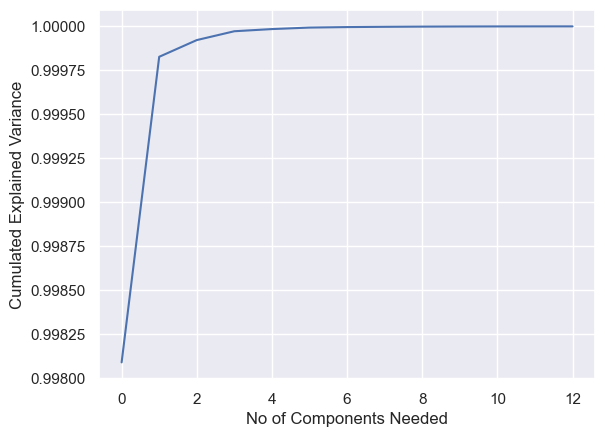

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel("No of Components Needed")

plt.ylabel("Cumulated Explained Variance")

we have to decide if we need to standardize or not 

if we have bigger and bigger numbers we will have bias because de ML will go with the big numbers

In [11]:
pca = PCA(4)

projected = pca.fit_transform(wine_nolabel)

we are using 4 because it shows in the graph 

In [12]:
projected.shape

(178, 4)

In [13]:
projected

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00,
        -2.50113758e-01],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00,
        -8.64034749e-01],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00,
         9.12410681e-01],
       [ 7.33240139e+02,  1.92729032e-01, -9.17257016e-01,
        -5.41250645e-01],
       [-1.15714285e+01,  1.84899946e+01, -5.54422076e-01,
         1.36089609e+00],
       [ 7.03231192e+02, -3.32158674e-01,  9.49375334e-01,
        -3.59993827e-01],
       [ 5.42971581e+02, -1.35189666e+01,  2.12694283e+00,
         5.55661430e-02],
       [ 5.48401860e+02,  1.14494324e+01,  4.04924202e-02,
         1.34945380e+00],
       [ 2.98036863e+02, -8.18015784e+00,  3.88097517e+00,
        -9.10643037e-01],
       [ 2.98049553e+02, -7.10154294e+00,  1.55845533e+00,
        -1.67704202e+00],
       [ 7.63079712e+02, -8.33431723e+00, -1.88629037e+00,
         1.59831835e+00],
       [ 5.32943228e+02, -1.42876338e+01,  1.30335240e-01,
      

this is an array and it does not help us

In [15]:
wine_pca = pd.DataFrame(projected, columns = ["C1" , "C2", "C3", "C4"])

we are transforming our array in a data frame with new features 

In [16]:
wine_pca.head()

,C1,C2,C3,C4
0,318.562979,21.492131,3.130735,-0.250114
1,303.097420,-5.364718,6.822835,-0.864035
2,438.061133,-6.537309,-1.113223,0.912411
3,733.240139,0.192729,-0.917257,-0.541251
4,-11.571428,18.489995,-0.554422,1.360896


we can use to train our model because there is no target values, now we need to add it

In [17]:
wine_pca["Cultivar"] = wine["Cultivar"]

In [18]:
wine_pca.head()

,C1,C2,C3,C4,Cultivar
0,318.562979,21.492131,3.130735,-0.250114,1
1,303.097420,-5.364718,6.822835,-0.864035,1
2,438.061133,-6.537309,-1.113223,0.912411,1
3,733.240139,0.192729,-0.917257,-0.541251,1
4,-11.571428,18.489995,-0.554422,1.360896,1


why the target variable is in the end, can we put in the beginning 

the ML needs an array 

In [19]:
wine_array = wine_pca.values

In [22]:
from sklearn.model_selection import train_test_split 

we are going to take a percentage of the dataframe to train the ML model 

In [23]:
X = wine_array[:,0:4]

y = wine_array[:,4]

X = wine_array[:,0:4]


the first is: all the rows until the 3rd column


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

random_state create the random numbers to train the ML

import all the models that I want to test 

and then create a list to store all of them

create a loop 


stratifiedkfold = the training is not going through row by row, but by groups randomly